# Scene Elements

We already saw in the previous tutorials how to add scene elements.
In this tutorial, we will introduce different types of scene elements.

pygame 2.0.1 (SDL 2.0.14, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


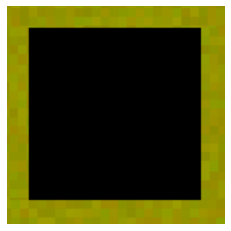

In [1]:
from simple_playgrounds.playgrounds import SingleRoom
from simple_playgrounds import Engine

%matplotlib inline
import matplotlib.pyplot as plt

def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
my_playground = SingleRoom(size=(100, 100))

engine = Engine(time_limit=1000, playground= my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

## Contact Entities:

Different entities react upon contact with an agent. Here are examples for Candy and VisibleEndGoal

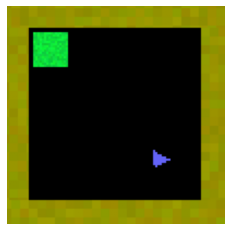

In [3]:
from simple_playgrounds.playgrounds.scene_elements import VisibleEndGoal, Candy
from simple_playgrounds.utils.position_utils import CoordinateSampler

endgoal = VisibleEndGoal()
my_playground.add_scene_element(endgoal, ((20,20), 0))

candy = Candy()
my_playground.add_scene_element(candy, ((70,70),0))

plt_image(engine.generate_playground_image(plt_mode=True))

Now, we can add an agent and interact with the elements.
If the agent touches the VisibleEndGoal, as we set the engine to restart when the playground reaches termination, the playgrond is reset.

In [8]:
from simple_playgrounds.agents.parts.controllers import Keyboard, RandomDiscrete
from simple_playgrounds.agents.agents import BaseAgent, HeadAgent

my_agent = BaseAgent(controller=Keyboard(), interactive = True, radius = 10)
my_playground.add_agent(my_agent)


In [9]:
engine.reset()
engine = Engine(time_limit=10000, playground=my_playground, screen=True)
engine.run(update_screen=True, print_rewards = True)
engine.terminate()

agent_0  got reward  5
agent_0  got reward  200


## Interactive Scene Elements

You can now explore different test environments that implement the usual SceneElements.
Interact with them using A for activating, E for eating, and G for grasping.

Try to bring the yellow coins to the orange vending machine, or the grey key to the purple chest.

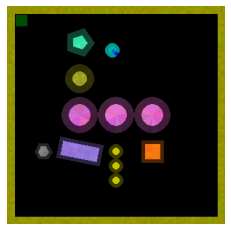

In [11]:
from simple_playgrounds.playgrounds.collection import Interactives

my_agent = HeadAgent(controller=Keyboard(), interactive = True, radius = 10)
my_playground = Interactives()

my_playground.add_agent(my_agent)

engine = Engine(my_playground, 10000, screen=True)
plt_image(engine.generate_playground_image(plt_mode=True))

engine.run(update_screen=True, print_rewards = True)
engine.terminate()

## Doors and switches

Simple-playgrounds provides doors and switches to create complex mazes.

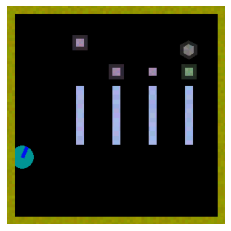

In [14]:
# Doors and switches Scene Elements

from simple_playgrounds.playgrounds.collection import Doors


my_agent = BaseAgent(controller=Keyboard(), interactive=True)
my_playground = Doors()
my_playground.add_agent(my_agent)
engine = Engine(my_playground, 10000, screen=True)

plt_image(engine.generate_playground_image(plt_mode=True))

engine.run(update_screen=True, print_rewards = True)
engine.terminate()

## Teleports

Simple-playgrounds provides teleports that can move the agent to its target's centre.

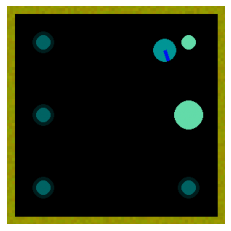

In [17]:
from simple_playgrounds.playgrounds.collection import Teleports


my_agent = BaseAgent(controller=Keyboard(), interactive=True)
my_playground = Teleports()
my_playground.add_agent(my_agent)
engine = Engine(my_playground, 10000, screen=True)

plt_image(engine.generate_playground_image(plt_mode=True))

engine.run(update_screen=True, print_rewards = True)
engine.terminate()

## Other test playgrounds

You can test different entities by loading existing test playgrounds.
Pick other test playgrounds already available: Contacts, Basics, Graspables,Zones, Interactives, Conditioning, Doors, Proximity, Fields

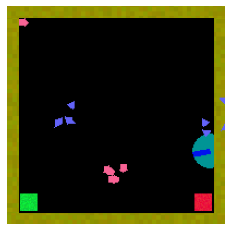

agent_4  got reward  5
agent_4  got reward  5
agent_4  got reward  5
agent_4  got reward  5
agent_4  got reward  5
agent_4  got reward  50


In [20]:
from simple_playgrounds.playgrounds.collection import Contacts

area_start = CoordinateSampler((150,150), 'rectangle', width_length=[100, 100])
my_agent = BaseAgent(controller=Keyboard(), interactive=True)
my_playground = Contacts()
my_playground.add_agent(my_agent, area_start)
engine = Engine(my_playground, 1000, screen=True)

plt_image(engine.generate_playground_image(plt_mode=True))


engine.run(update_screen=True, print_rewards = True)
engine.terminate()